In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
mlt.style.use('fivethirtyeight')
from scipy import stats
from scipy.stats import norm,skew
from sklearn.cluster import KMeans
%matplotlib inline

In [26]:
data = pd.read_csv('Leaderboard_dataset.csv')

C:\Users\iramaniparth\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
data=data.replace('missing',np.nan)
data=data.replace('na',np.nan)
data=data.replace('N/A',np.nan)

In [28]:
for sl in range(1,47):
    data['mvar'+str(sl)] = data['mvar'+str(sl)].astype(float)

In [29]:
data['mvar47'].loc[data['mvar47'] == 'L'] = 0
data['mvar47'].loc[data['mvar47'] == 'C'] = 1

C:\Users\iramaniparth\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
data.to_csv('amextestNA.csv')

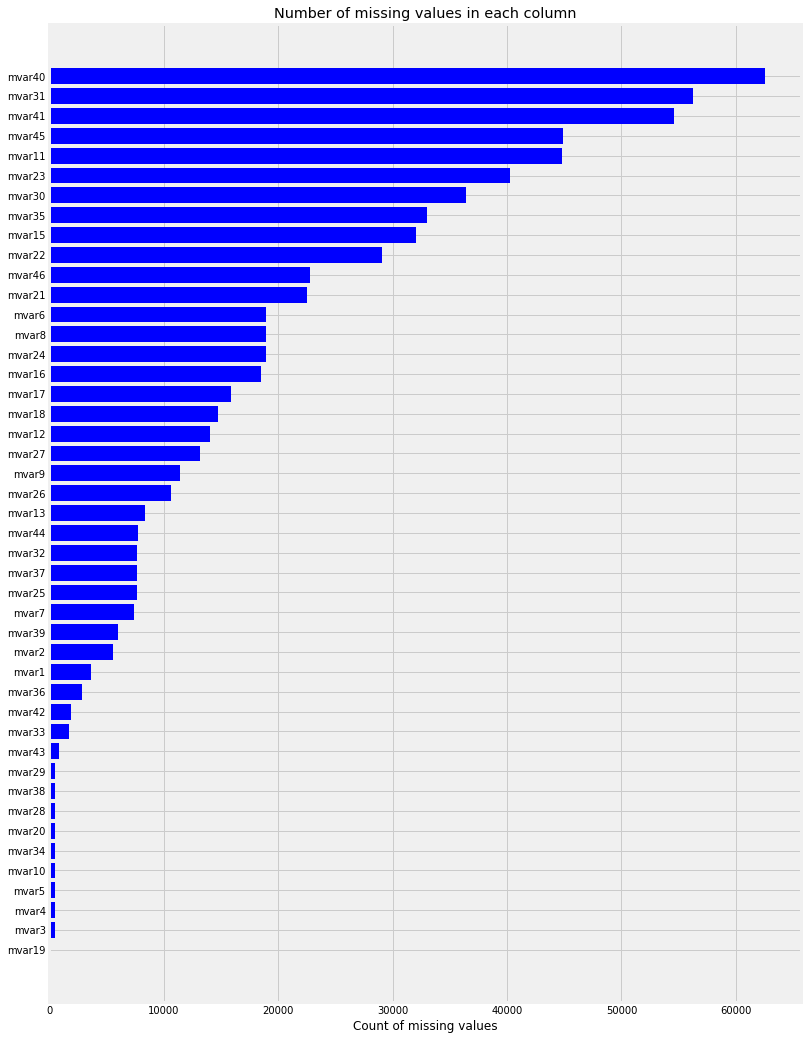

In [23]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

C:\Users\iramaniparth\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


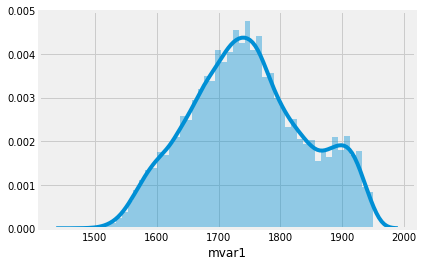

In [67]:
k=data.corr(method='pearson')
import seaborn as sns
%matplotlib inline
sns.distplot(data['mvar1'].loc[data['mvar1'].notnull()], kde = True)

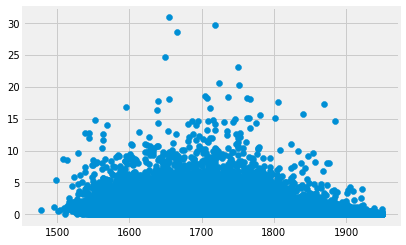

In [69]:
fig, ax = mlt.subplots()
ax.scatter(x = data['mvar1'], y = data['mvar2'])
mlt.ylabel('', fontsize=13)
mlt.xlabel('', fontsize=13)
mlt.show()

In [70]:
krev = data[['mvar6', 'mvar8', 'mvar16', 'mvar21', 'mvar25', 'mvar27', 'mvar35']]
krevtr = krev.dropna()

In [71]:
values = krev.values

In [72]:
from sklearn.preprocessing import Imputer
imputer = Imputer()

In [73]:
transformed_values = imputer.fit_transform(values)

In [74]:
X = pd.DataFrame(transformed_values)
X.columns = krev.columns

In [75]:
for index in X.columns:
    print(index)
    data[index]=X[index]

mvar6
mvar8
mvar16
mvar21
mvar25
mvar27
mvar35


In [76]:
kcline = data[['mvar7', 'mvar10', 'mvar18', 'mvar20', 'mvar22', 'mvar34', 'mvar36', 'mvar38', 'mvar39', 'mvar43', 'mvar44']]
kclinetr = kcline.dropna()

In [77]:
values = kcline.values

In [78]:
from sklearn.preprocessing import Imputer
imputer = Imputer()

In [79]:
transformed_values = imputer.fit_transform(values)

In [80]:
X = pd.DataFrame(transformed_values)
X.columns = kcline.columns

In [81]:
for index in X.columns:
    print(index)
    data[index]=X[index]

mvar7
mvar10
mvar18
mvar20
mvar22
mvar34
mvar36
mvar38
mvar39
mvar43
mvar44


In [82]:
kccard = data[['mvar9', 'mvar12', 'mvar13', 'mvar17', 'mvar19', 'mvar23', 'mvar24', 'mvar26', 'mvar32', 'mvar37']]
kccardtr = kccard.dropna()

In [83]:
values = kccard.values

In [84]:
from sklearn.preprocessing import Imputer
imputer = Imputer()

In [85]:
transformed_values = imputer.fit_transform(values)

In [86]:
X = pd.DataFrame(transformed_values)
X.columns = kccard.columns

In [87]:
for index in X.columns:
    print(index)
    data[index]=X[index]

mvar9
mvar12
mvar13
mvar17
mvar19
mvar23
mvar24
mvar26
mvar32
mvar37


In [88]:
kloans = data[['mvar3', 'mvar4', 'mvar5', 'mvar29', 'mvar30', 'mvar31', 'mvar45', 'mvar46', 'mvar40', 'mvar41']]
kloanstr = kloans.dropna()

In [89]:
values = kloans.values

In [90]:
from sklearn.preprocessing import Imputer
imputer = Imputer()

In [91]:
transformed_values = imputer.fit_transform(values)

In [92]:
X = pd.DataFrame(transformed_values)
X.columns = kloans.columns

In [93]:
data.to_csv('amextest.csv')